## Setup

In [2]:
import sys
import os
sys.path.append(os.path.join("..", ".."))
import model
import numpy as np

## Data Generation

In [3]:
sim = model.sim.simulate()

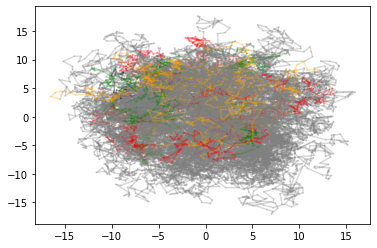

In [4]:
model.sim.plot_sim(sim)

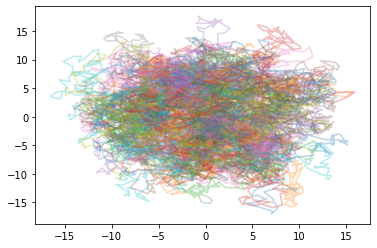

In [5]:
model.sim.plot_sim(sim, color_status=False)

In [4]:
sim['location']

patient  date  latitude  longitude
0            0     0 -2.245146   0.813738
1            0     1 -2.764336  -0.255947
2            0     2 -1.897354  -2.537493
3            0     3 -0.166531  -3.281504
4            0     4  0.148281  -3.515523
...        ...   ...       ...        ...
19995      199    95 -5.936190  -7.130280
19996      199    96 -5.566228  -7.135726
19997      199    97 -6.056172  -6.943595
19998      199    98 -5.445797  -6.413620
19999      199    99 -5.149223  -6.344549

[20000 rows x 4 columns]

In [5]:
sim['tests']

patient  date  result
0         3    39    True
1       189    18    True
2       101    44   False
3        53    60    True
4       192    77   False
5       120    22    True
6        10    12   False
7       124    28    True
8        48    81    True
9        28    57   False
10      110    11    True
11        7     7    True
12      180    43    True
13      187    41    True
14      127    98   False
15       25    75    True
16       47    59    True
17       99    21    True
18      115     0    True
19       51    66   False
20      181     7    True
21      130     3   False
22      109    69    True
23       63    44   False
24      190    26    True
25      165    47    True
26       18    67    True
27       95    10   False
28       33    75    True
29      198     5    True
30       73    60   False
31      137    20    True
32      156    16    True
33       13    38    True
34      117    88    True
35      157     2   False
36       37    59    True
37      173    67   False
38      179    55    True
39       81    54    True
40       92    68    True
41        2    41    True
42        0    43    True
43       65    83    True
44      128    68    True
45      176    20   False
46      194    71    True
47       64    51    True
48       38    63    True
49      133    72   False

In [6]:
sim['hospital']

patient  date
0       180    41
5       198    24
7       109    36
10       64    12
11       65    17
12      128    61
15        3    83
18        7     1
22       25    71
25      110    53
26      179    69
28      165    79
29      137     7
31        0    21
33      124    44
38       33    63
42       18    58
43      120    87
44       13    70
47      115    54

In [7]:
sim['deaths']

patient  date
11       65    27
15      115    89
47        3    56

## Disease spread modeling

For model specification, see the [README](../../README.md)

In [6]:
# compute the average number of contacts per person per day
N_c = model.model.calculate_Nc(sim, distance_cutoff=1.5)
N_c

3.1087

In [7]:
# set the initial state -- at present everyone is healthy
state = model.model.initial_state(sim)
state

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [8]:
# evaluate contacts each day and update the model
for date in sim["dates"]["date"]:
    state = model.model.next_state(sim, state, date, N_c)

In [9]:
# print the final model state
with np.printoptions(threshold=np.inf):
    print(state.round(3))

[[0.    0.    0.    0.    0.    0.    0.002 0.978 0.02 ]
 [0.131 0.018 0.004 0.001 0.005 0.    0.002 0.83  0.01 ]
 [0.    0.    0.    0.    0.    0.    0.002 0.978 0.02 ]
 [0.    0.    0.    0.    0.    0.    0.287 0.57  0.143]
 [0.113 0.006 0.005 0.    0.008 0.001 0.003 0.854 0.01 ]
 [0.3   0.003 0.001 0.    0.001 0.    0.001 0.685 0.008]
 [0.865 0.03  0.002 0.001 0.003 0.    0.001 0.097 0.001]
 [0.    0.    0.    0.    0.    0.    0.    0.98  0.02 ]
 [0.113 0.001 0.002 0.    0.003 0.    0.002 0.868 0.01 ]
 [0.211 0.022 0.009 0.003 0.012 0.001 0.003 0.731 0.008]
 [0.    0.    0.    0.    0.    0.    0.    0.98  0.02 ]
 [0.105 0.023 0.006 0.001 0.009 0.001 0.002 0.843 0.01 ]
 [0.083 0.044 0.006 0.001 0.008 0.001 0.003 0.844 0.01 ]
 [0.    0.    0.    0.    0.    0.    0.104 0.717 0.179]
 [0.091 0.004 0.002 0.    0.003 0.    0.001 0.888 0.011]
 [0.584 0.004 0.002 0.    0.003 0.    0.001 0.401 0.005]
 [0.151 0.004 0.005 0.    0.007 0.001 0.003 0.818 0.009]
 [0.338 0.012 0.004 0.    0.006